# Tabelas Pivotadas

Pandas fornece a função pivot_table() para pivotar tabelas agregando dados numéricos. A ação de pivotar envolve um agrupamento (GroupBy) seguido da aplicação de função(ões) de agregação. A função pivot_table() recebe os seguintes argumentos:

<ol>
<li>data: uma <em>DataFrame</em>.</li>
<li>values: uma coluna ou lista de colunas cujos valores serão agregados.</li>
<li>index: coluna(s), um objeto do tipo <em>Grouper</em> ou <em>array</em> que será usado como índice para as linhas da tabela resultante.</li>
<li>columns: coluna(s), um objeto do tipo <em>Grouper</em> ou <em>array</em> que define as colunas da tabela resultante.</li>
<li>aggfunc: função(ões) para realizar a agregação, com <em>numpy.mean</em> por padrão.</li>
</ol>
<p>Exemplo:</p>

In [3]:
import numpy as np
import pandas as pd
import datetime

df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 6,
                   'B': ['A', 'B', 'C'] * 8,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 4,
                   'D': np.random.randn(24),
                   'E': np.random.randn(24),
                   'F': [datetime.datetime(2013, i, 1) for i in range(1, 13)]
                   + [datetime.datetime(2013, i, 15) for i in range(1, 13)]})


df

,A,B,C,D,E,F
0,one,A,foo,1.101059,-0.792198,2013-01-01
1,one,B,foo,1.030218,-0.711603,2013-02-01
2,two,C,foo,1.875689,-1.300061,2013-03-01
3,three,A,bar,0.130639,-1.191584,2013-04-01
4,one,B,bar,1.005263,0.757884,2013-05-01
5,one,C,bar,0.785374,1.410419,2013-06-01
6,two,A,foo,1.282970,-0.905109,2013-07-01
7,three,B,foo,-1.756759,-0.389775,2013-08-01
8,one,C,foo,0.652375,-0.533845,2013-09-01
9,one,A,bar,-0.157815,-2.029385,2013-10-01


In [4]:
pd.pivot_table(
    df, 
    values='D', 
    index=['A', 'B'], 
    columns=['C']
)

C             bar       foo
A     B                    
one   A -0.191169  0.607381
      B  0.912202  0.847817
      C -0.023052  0.572135
three A  0.770502       NaN
      B       NaN -0.425636
      C -1.261820       NaN
two   A       NaN  0.736231
      B  0.604430       NaN
      C       NaN  0.442894

In [5]:
pd.pivot_table(
    df, 
    values='D', 
    index=['B'], 
    columns=['A', 'C'], 
    aggfunc=np.sum
)

A       one               three                 two          
C       bar       foo       bar       foo       bar       foo
B                                                            
A -0.382338  1.214762  1.541004       NaN       NaN  1.472462
B  1.824404  1.695634       NaN -0.851273  1.208861       NaN
C -0.046104  1.144271 -2.523639       NaN       NaN  0.885789

In [6]:
    pd.pivot_table(
    df, 
    values=['D', 'E'], 
    index=['B'], 
    columns=['A', 'C'], 
    aggfunc=np.sum
)

D                                                           E  \
A       one               three                 two                 one   
C       bar       foo       bar       foo       bar       foo       bar   
B                                                                         
A -0.382338  1.214762  1.541004       NaN       NaN  1.472462 -1.865248   
B  1.824404  1.695634       NaN -0.851273  1.208861       NaN  1.097151   
C -0.046104  1.144271 -2.523639       NaN       NaN  0.885789  0.253702   

                                                     
A               three                 two            
C       foo       bar       foo       bar       foo  
B                                                    
A -1.327582 -2.544041       NaN       NaN  0.685365  
B -0.963055       NaN -2.629192 -0.676787       NaN  
C -0.943506  0.503134       NaN       NaN -1.181460

O objeto resultante é uma DataFrame com índices e colunas potencialmente hieráquicos. Se o argumento values não for especificado, a tabela pivotada irá conter todas as colunas que podem ser agregadas em um nível adicional de hierarquia nas colunas:

In [7]:
pd.pivot_table(df, index=['A', 'B'], columns=['C'])

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.191169  0.607381 -0.932624 -0.663791
      B  0.912202  0.847817  0.548575 -0.481527
      C -0.023052  0.572135  0.126851 -0.471753
three A  0.770502       NaN -1.272021       NaN
      B       NaN -0.425636       NaN -1.314596
      C -1.261820       NaN  0.251567       NaN
two   A       NaN  0.736231       NaN  0.342683
      B  0.604430       NaN -0.338394       NaN
      C       NaN  0.442894       NaN -0.590730

Um objeto Grouper pode ser usado para os argumentos index e columns. No código abaixo, Grouper é usado para definir um agrupamento mensal das datas da coluna 'F'. Para mais possibilidades de frequência e agrupamento, ver a documentação de Grouper.

In [8]:
pd.pivot_table(
    df, 
    values='D', 
    index=pd.Grouper(freq='M', key='F'),
    columns='C'
)

C,bar,foo
F,,
2013-01-31,NaN,0.607381
2013-02-28,NaN,0.847817
2013-03-31,NaN,0.442894
2013-04-30,0.770502,NaN
2013-05-31,0.912202,NaN
2013-06-30,-0.023052,NaN
2013-07-31,NaN,0.736231
2013-08-31,NaN,-0.425636
2013-09-30,NaN,0.572135


Para imprimir a tabela resultante usando uma representação mais interessante para os dados faltantes, pode-se usar o método to_string:

In [9]:
table = pd.pivot_table(df, index=['A', 'B'], columns=['C'])

print(table.to_string(na_rep=''))

                D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.191169  0.607381 -0.932624 -0.663791
      B  0.912202  0.847817  0.548575 -0.481527
      C -0.023052  0.572135  0.126851 -0.471753
three A  0.770502           -1.272021          
      B           -0.425636           -1.314596
      C -1.261820            0.251567          
two   A            0.736231            0.342683
      B  0.604430           -0.338394          
      C            0.442894           -0.590730


In [10]:
print(table.to_string(na_rep='X'))

                D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.191169  0.607381 -0.932624 -0.663791
      B  0.912202  0.847817  0.548575 -0.481527
      C -0.023052  0.572135  0.126851 -0.471753
three A  0.770502         X -1.272021         X
      B         X -0.425636         X -1.314596
      C -1.261820         X  0.251567         X
two   A         X  0.736231         X  0.342683
      B  0.604430         X -0.338394         X
      C         X  0.442894         X -0.590730


A função pivot_table() é frequentemente usada para agregar resultados de experimentos. Exemplo:

In [12]:
df = pd.DataFrame(
    {
        'accuracy': np.random.rand(40),
        'cross-entropy': np.random.rand(40) * 5,
        'method': ['LR'] * 10 + ['DT'] * 10 + ['SVM'] * 10 + ['NB'] * 10
    }
)


df

,accuracy,cross-entropy,method
0,0.026562,0.417589,LR
1,0.299502,1.062699,LR
2,0.925757,2.924653,LR
3,0.640143,2.986618,LR
4,0.868239,2.384604,LR
5,0.029752,2.274974,LR
6,0.187299,1.237642,LR
7,0.012306,2.128844,LR
8,0.699513,1.953728,LR
9,0.719293,4.673933,LR


In [13]:
results = pd.pivot_table(
    df, 
    values=['accuracy', 'cross-entropy'], 
    index='method',
    aggfunc=[np.mean, np.std]
)

results

mean                     std              
        accuracy cross-entropy  accuracy cross-entropy
method                                                
DT      0.478711      2.643126  0.256447      1.546134
LR      0.440837      2.204528  0.366743      1.190985
NB      0.444218      3.132218  0.303151      0.991755
SVM     0.415997      2.772360  0.309596      1.232230

Após a geração da tabela pivotada com os resultados, pode-se gerar a tabela em formato de código LaTeX, para inclusão em artigos e relatórios:

In [14]:
results.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} & \\multicolumn{2}{l}{mean} & \\multicolumn{2}{l}{std} \\\\\n{} &  accuracy & cross-entropy &  accuracy & cross-entropy \\\\\nmethod &           &               &           &               \\\\\n\\midrule\nDT     &  0.478711 &      2.643126 &  0.256447 &      1.546134 \\\\\nLR     &  0.440837 &      2.204528 &  0.366743 &      1.190985 \\\\\nNB     &  0.444218 &      3.132218 &  0.303151 &      0.991755 \\\\\nSVM    &  0.415997 &      2.772360 &  0.309596 &      1.232230 \\\\\n\\bottomrule\n\\end{tabular}\n'

O retorno de to_latex() inclui barras duplas e quebras de linhas com \n pois elas são necessárias para retornar barras dentro de strings Python.

\begin{tabular}{lrrrr}
\toprule
{} & \multicolumn{2}{l}{mean} & \multicolumn{2}{l}{std} \\
{} &  accuracy & cross-entropy &  accuracy & cross-entropy \\
method &           &               &           &               \\
\midrule
DT     &  0.365762 &      2.227704 &  0.326730 &      1.327534 \\
LR     &  0.314544 &      2.995433 &  0.250636 &      1.146052 \\
NB     &  0.439088 &      2.596552 &  0.286103 &      1.748327 \\
SVM    &  0.631967 &      2.153559 &  0.296118 &      1.059571 \\
\bottomrule
\end{tabular}

# Reindexando e alterando rótulos

Suponha que você tem dados provenientes de fontes diferentes. As tabelas tem colunhas e linhas em comum e outras diferentes. Você quer trabalhar com os dados em comum, e preencher os valores faltantes de alguma forma. Além disso, você quer que os dados estejam dispostos em uma ordenação específica através dos índices e das colunas. Tudo isso pode ser realizado por meio do método reindex(), que é a forma principal de "realinhar" dados em pandas. Reindexar significa ajustar os dados a um dado conjuntode rótulos através de um eixo. Isso permite reordenar os dados existentes, inserir posições faltantes onde não existem dados para os rótulos passados e preencher esses dados faltantes. Exemplo:

In [17]:
s = pd.Series(
    np.random.randn(5), 
    index=['a', 'b', 'c', 'd', 'e']
)

s

a    0.426058
b    0.440276
c   -1.110881
d   -1.734554
e   -0.047868
dtype: float64

In [18]:
s.reindex(['e', 'b', 'f', 'd'])

e   -0.047868
b    0.440276
f         NaN
d   -1.734554
dtype: float64

Note que o rótulo 'f' não estava presente na Series, aparecendo como NaN no resultado. No caso de DataFrames, é possível reindexar índices e colunas simultaneamente:

In [19]:
df = pd.DataFrame({
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
    'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])
})

df

,one,two,three
a,-0.373968,-1.567574,NaN
b,0.968562,0.269729,0.171279
c,-0.851992,0.297799,0.948248
d,NaN,-1.631696,1.213055


In [20]:
df.reindex(
    index=['c', 'f', 'b'], 
    columns=['three', 'two', 'one']
)

,three,two,one
c,0.948248,0.297799,-0.851992
f,NaN,NaN,NaN
b,0.171279,0.269729,0.968562


O método reindex() também pode ser usado com o argumento axis:

In [22]:
df.reindex(['c', 'f', 'b'], axis='index')

,one,two,three
c,-0.851992,0.297799,0.948248
f,NaN,NaN,NaN
b,0.968562,0.269729,0.171279


In [23]:
df.reindex(['c', 'f', 'b'], axis='columns')

,c,f,b
a,NaN,NaN,NaN
b,NaN,NaN,NaN
c,NaN,NaN,NaN
d,NaN,NaN,NaN


In [24]:
df.reindex(['three', 'two', 'one'], axis='columns')

,three,two,one
a,NaN,-1.567574,-0.373968
b,0.171279,0.269729,0.968562
c,0.948248,0.297799,-0.851992
d,1.213055,-1.631696,NaN


In [25]:
df.reindex(['three', 'two', 'one'], axis='index')

,one,two,three
three,NaN,NaN,NaN
two,NaN,NaN,NaN
one,NaN,NaN,NaN


Objetos do tipo Index podem ser compartilhados entre objetos Series e DataFrame por meio do método reindex:

In [26]:
rs = s.reindex(df.index)

rs

a    0.426058
b    0.440276
c   -1.110881
d   -1.734554
dtype: float64

In [27]:
rs.index is df.index

True

Para reindexar um objeto, de forma que ele fique perfeitamente "alinhado" com outro, pode-se usar o "atalho" reindex_like():

In [28]:
df

,one,two,three
a,-0.373968,-1.567574,NaN
b,0.968562,0.269729,0.171279
c,-0.851992,0.297799,0.948248
d,NaN,-1.631696,1.213055


In [29]:
df2 = pd.DataFrame({
    'two': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
})

df2

,two,one
a,0.366495,2.467635
b,-1.816126,0.483336
c,-1.020401,1.298104


In [30]:
df.reindex_like(df2)

,two,one
a,-1.567574,-0.373968
b,0.269729,0.968562
c,0.297799,-0.851992


A operação de reindexação torna-se mais importante quando é necessário escrever códigos cujo desempenho é fator essencial. Diversas operações são realizadas mais rapidamente sobre dados pré-alinhados, como as operações aritméticas, que precisam disparar um realinhamento interno, se os dados não estiverem alinhados.

Caso seja interessante alinhar dois objeto simultaneamente, pode-se usar o método align (ao invés de duas chamadas ao método reindex). O método align retorna uma tupla com os dois objetos realinhados e aceita o argumento join para indicar a forma como os objetos serão alinhados:

<ol>
<li>join='outer': toma a união dos índices (default);</li>
<li>join='left': usa o índice do objeto que chama o método;</li>
<li>join='right': usa o índice do objeto passado como parâmetro;</li>
<li>join='inner': toma a interseção do síndices.</li>
</ol>
<p>Exemplos:</p>

In [32]:
s = pd.Series(
    np.random.randn(5), 
    index=['a', 'b', 'c', 'd', 'e']
)

s1 = s[:4]
s2 = s[1:]
s1.align(s2)

(a    0.989372
 b   -0.194904
 c   -0.394607
 d    0.137890
 e         NaN
 dtype: float64, a         NaN
 b   -0.194904
 c   -0.394607
 d    0.137890
 e   -1.578551
 dtype: float64)

In [33]:
s1.align(s2, join='inner')

(b   -0.194904
 c   -0.394607
 d    0.137890
 dtype: float64, b   -0.194904
 c   -0.394607
 d    0.137890
 dtype: float64)

In [34]:
s1.align(s2, join='left')

(a    0.989372
 b   -0.194904
 c   -0.394607
 d    0.137890
 dtype: float64, a         NaN
 b   -0.194904
 c   -0.394607
 d    0.137890
 dtype: float64)

Para DataFrames, o join é aplicado aos índices e às colunas por padrão:

In [36]:
df

,one,two,three
a,-0.373968,-1.567574,NaN
b,0.968562,0.269729,0.171279
c,-0.851992,0.297799,0.948248
d,NaN,-1.631696,1.213055


In [37]:
df2

,two,one
a,0.366495,2.467635
b,-1.816126,0.483336
c,-1.020401,1.298104


In [38]:
df.align(df2, join='inner')

(        one       two
 a -0.373968 -1.567574
 b  0.968562  0.269729
 c -0.851992  0.297799,         one       two
 a  2.467635  0.366495
 b  0.483336 -1.816126
 c  1.298104 -1.020401)

Usando o argumento axis, é possível especificar a qual eixo o join deve ser aplicado:

In [39]:
df.align(df2, join='inner', axis=0)

(        one       two     three
 a -0.373968 -1.567574       NaN
 b  0.968562  0.269729  0.171279
 c -0.851992  0.297799  0.948248,         two       one
 a  0.366495  2.467635
 b -1.816126  0.483336
 c -1.020401  1.298104)

Ao passar uma Series ao método align de uma DataFrame,é possível escolher alinhas ambos os objetos de acordo com o índice ou com as colunas da DataFrame, usando o argumento axis:

In [40]:
df.align(df2.iloc[0], axis=1)

(        one     three       two
 a -0.373968       NaN -1.567574
 b  0.968562  0.171279  0.269729
 c -0.851992  0.948248  0.297799
 d       NaN  1.213055 -1.631696, one      2.467635
 three         NaN
 two      0.366495
 Name: a, dtype: float64)

**Preenchendo valores faltantes**

O método reindex pode receber um parâmetro opcional que determina uma forma de preencher dados faltantes. Os valores possíveis para esse argumento são:

<ol>
<li>pad/ffill: preenche os valores para a frente;</li>
<li>bfill/backfill: preenche os valores para trás;</li>
<li>nearest: preenche com os valores do índice mais próximo.</li>
</ol>
<p>Exemplos:</p>

In [41]:
rng = pd.date_range('1/3/2000', periods=8)

ts = pd.Series(np.random.randn(8), index=rng)

ts2 = ts[[0, 3, 6]]

ts

2000-01-03    0.248582
2000-01-04    0.190527
2000-01-05   -0.596552
2000-01-06    0.114746
2000-01-07    1.166733
2000-01-08   -0.320749
2000-01-09    1.786163
2000-01-10    0.652444
Freq: D, dtype: float64

In [42]:
ts2

2000-01-03    0.248582
2000-01-06    0.114746
2000-01-09    1.786163
dtype: float64

In [43]:
ts2.reindex(ts.index)

2000-01-03    0.248582
2000-01-04         NaN
2000-01-05         NaN
2000-01-06    0.114746
2000-01-07         NaN
2000-01-08         NaN
2000-01-09    1.786163
2000-01-10         NaN
Freq: D, dtype: float64

In [44]:
ts2.reindex(ts.index, method='ffill')

2000-01-03    0.248582
2000-01-04    0.248582
2000-01-05    0.248582
2000-01-06    0.114746
2000-01-07    0.114746
2000-01-08    0.114746
2000-01-09    1.786163
2000-01-10    1.786163
Freq: D, dtype: float64

In [45]:
ts2.reindex(ts.index, method='bfill')

2000-01-03    0.248582
2000-01-04    0.114746
2000-01-05    0.114746
2000-01-06    0.114746
2000-01-07    1.786163
2000-01-08    1.786163
2000-01-09    1.786163
2000-01-10         NaN
Freq: D, dtype: float64

In [46]:
ts2.reindex(ts.index, method='nearest')

2000-01-03    0.248582
2000-01-04    0.248582
2000-01-05    0.114746
2000-01-06    0.114746
2000-01-07    0.114746
2000-01-08    1.786163
2000-01-09    1.786163
2000-01-10    1.786163
Freq: D, dtype: float64

Note que esses métodos de preenchimento precisam que os índices estejam ordenados (em ordem ascendente ou decrescente). Caso seja desejável limitar o preenchimento de dados faltantes, para evitar que valores muito distantes sejam usados, pode-se usar os argumentos limit e tolerance. Limit especifica o número máximo de preenchimentos consecutivos:

In [47]:
ts2.reindex(ts.index, method='ffill', limit=1)

2000-01-03    0.248582
2000-01-04    0.248582
2000-01-05         NaN
2000-01-06    0.114746
2000-01-07    0.114746
2000-01-08         NaN
2000-01-09    1.786163
2000-01-10    1.786163
Freq: D, dtype: float64

Tolerance especifica o intervalo máximo entre o índice faltante e o índice que será usado para preenchê-lo.

In [48]:
ts2.reindex(ts.index, method='ffill', tolerance='1 day')

2000-01-03    0.248582
2000-01-04    0.248582
2000-01-05         NaN
2000-01-06    0.114746
2000-01-07    0.114746
2000-01-08         NaN
2000-01-09    1.786163
2000-01-10    1.786163
Freq: D, dtype: float64

Resultados parecidos de preenchimento podem ser obtidos pelo método fillna:

In [49]:
ts2.reindex(ts.index).fillna(method='ffill')

2000-01-03    0.248582
2000-01-04    0.248582
2000-01-05    0.248582
2000-01-06    0.114746
2000-01-07    0.114746
2000-01-08    0.114746
2000-01-09    1.786163
2000-01-10    1.786163
Freq: D, dtype: float64

O método fillna pode ser bastante útil por permitir o preenchimento usando um objeto pandas ou um dicionário que seja alinhável, ou seja, as chaves do dicionário ou índice da Series precisam se ajustar às colunas da DataFrame que será preenchida. Um caso de uso muito comum para isso é preencher dados faltantes com a média ou a mediana das colunas correspondentes:

In [50]:
dff = pd.DataFrame(np.random.randn(10, 3), columns=list('ABC'))

dff.iloc[3:5, 0] = np.nan

dff.iloc[4:6, 1] = np.nan

dff.iloc[5:8, 2] = np.nan

dff

,A,B,C
0,0.820418,-0.186191,-0.357676
1,0.057217,-0.654371,-2.413310
2,-0.439907,1.558835,0.043288
3,NaN,-0.718050,-0.382019
4,NaN,NaN,-0.786207
5,0.291058,NaN,NaN
6,-1.657403,-1.402238,NaN
7,0.472406,-0.385853,NaN
8,-0.542607,0.868705,0.142429
9,-0.943606,0.822342,0.587666


In [51]:
dff.mean()

A   -0.242803
B   -0.012103
C   -0.452261
dtype: float64

In [52]:
dff.fillna(dff.mean())

,A,B,C
0,0.820418,-0.186191,-0.357676
1,0.057217,-0.654371,-2.413310
2,-0.439907,1.558835,0.043288
3,-0.242803,-0.718050,-0.382019
4,-0.242803,-0.012103,-0.786207
5,0.291058,-0.012103,-0.452261
6,-1.657403,-1.402238,-0.452261
7,0.472406,-0.385853,-0.452261
8,-0.542607,0.868705,0.142429
9,-0.943606,0.822342,0.587666


In [53]:
dff.fillna(dff.median())

,A,B,C
0,0.820418,-0.186191,-0.357676
1,0.057217,-0.654371,-2.413310
2,-0.439907,1.558835,0.043288
3,-0.191345,-0.718050,-0.382019
4,-0.191345,-0.286022,-0.786207
5,0.291058,-0.286022,-0.357676
6,-1.657403,-1.402238,-0.357676
7,0.472406,-0.385853,-0.357676
8,-0.542607,0.868705,0.142429
9,-0.943606,0.822342,0.587666


In [54]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,0.820418,-0.186191,-0.357676
1,0.057217,-0.654371,-2.413310
2,-0.439907,1.558835,0.043288
3,NaN,-0.718050,-0.382019
4,NaN,-0.012103,-0.786207
5,0.291058,-0.012103,-0.452261
6,-1.657403,-1.402238,-0.452261
7,0.472406,-0.385853,-0.452261
8,-0.542607,0.868705,0.142429
9,-0.943606,0.822342,0.587666


Dados faltantes também podem ser preenchidos usando interpolação, por meio do método interpolate:

In [55]:
rng = pd.date_range('1/3/2000', periods=100)

ts2 = pd.Series(np.random.randn(100), index=rng)

ts2[np.random.choice(100, size=34, replace=False)] = np.nan

ts2

2000-01-03         NaN
2000-01-04   -0.957654
2000-01-05    0.594024
2000-01-06   -1.544543
2000-01-07    0.458417
                ...   
2000-04-07    0.802729
2000-04-08    0.140861
2000-04-09   -0.047857
2000-04-10   -0.572303
2000-04-11   -0.383312
Freq: D, Length: 100, dtype: float64

In [56]:
ts2.count()

66

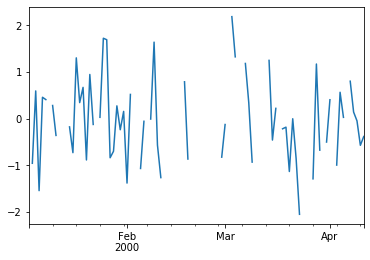

In [58]:
ts2.plot()

In [59]:
ts3 = ts2.interpolate()

ts3

2000-01-03         NaN
2000-01-04   -0.957654
2000-01-05    0.594024
2000-01-06   -1.544543
2000-01-07    0.458417
                ...   
2000-04-07    0.802729
2000-04-08    0.140861
2000-04-09   -0.047857
2000-04-10   -0.572303
2000-04-11   -0.383312
Freq: D, Length: 100, dtype: float64

In [60]:
ts3.count()

99

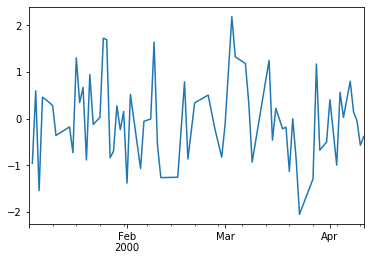

In [61]:
ts3.plot()

O método interpolate pode levar em consideração os valores dos índices (caso eles não sejam regularmente intervalados):

In [62]:
ser = pd.Series([0.0, np.nan, 10], index=[0., 1., 10.])

ser

0.0      0.0
1.0      NaN
10.0    10.0
dtype: float64

In [63]:
ser.interpolate()

0.0      0.0
1.0      5.0
10.0    10.0
dtype: float64

In [64]:
ser.interpolate(
    method='values'
)

0.0      0.0
1.0      1.0
10.0    10.0
dtype: float64

Também é possível interpolar DataFrames:

In [65]:
dfi = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
                   'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})

dfi

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [66]:
dfi.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


O argumento method flexibiliza interpolate para poder usar diferentes métodos de interpolação:

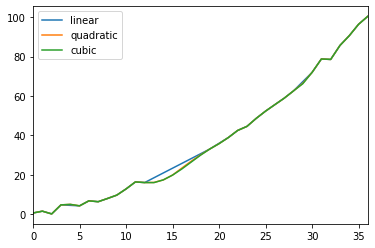

In [68]:
np.random.seed(2)

ser = pd.Series(np.arange(1, 10.1, .25) ** 2 + np.random.randn(37))

missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])

ser[missing] = np.nan

methods = ['linear', 'quadratic', 'cubic']

dfi = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})

dfi.plot()

# Removendo rótulos

Caso a intenção ao usar reindex seja apenas remover certos rótulos, o ideal é usar o método drop:

In [70]:
df

,one,two,three
a,-0.373968,-1.567574,NaN
b,0.968562,0.269729,0.171279
c,-0.851992,0.297799,0.948248
d,NaN,-1.631696,1.213055


In [71]:
df.drop(['a', 'd'], axis=0)

,one,two,three
b,0.968562,0.269729,0.171279
c,-0.851992,0.297799,0.948248


In [72]:
df.reindex(
    df.index.difference(
        ['a', 'd']
    )
)  # o mesmo resultado, mas usando reindex

,one,two,three
b,0.968562,0.269729,0.171279
c,-0.851992,0.297799,0.948248


In [73]:
df.drop(['one'], axis=1)

,two,three
a,-1.567574,NaN
b,0.269729,0.171279
c,0.297799,0.948248
d,-1.631696,1.213055


# Renomeando rótulos 

Para renomear índices e colunas, pandas fornece o método rename(), que pode receber como parâmetros um dicionário, uma Series ou uma função. Caso uma função seja usada, ela deve retornar um valor único e válido para cada rótulo renomeado.

In [74]:
s

a    0.989372
b   -0.194904
c   -0.394607
d    0.137890
e   -1.578551
dtype: float64

In [75]:
s.rename(str.upper)

A    0.989372
B   -0.194904
C   -0.394607
D    0.137890
E   -1.578551
dtype: float64

Ao renomear usando um mapeamento, os rótulos que não forem especificados não são renomeados. Além disso, se o mapeamento contiver rótulos inexistentes, eles são apenas ignorados sem erro.

In [77]:
df

,one,two,three
a,-0.373968,-1.567574,NaN
b,0.968562,0.269729,0.171279
c,-0.851992,0.297799,0.948248
d,NaN,-1.631696,1.213055


In [78]:
df.rename(
    columns={'one': 'foo', 'two': 'bar'},
    index={'a': 'apple', 'b': 'banana', 'd': 'durian'}
)

,foo,bar,three
apple,-0.373968,-1.567574,NaN
banana,0.968562,0.269729,0.171279
c,-0.851992,0.297799,0.948248
durian,NaN,-1.631696,1.213055


# Substituindo valores 

Frequentemente é necessário substituir certos valores em uma DataFrame ou Series. O método replace é uma forma simples e eficiente de realizar essa operação. Em uma Series, é possível substituir um único valor ou uma lista de valores por outros valores:

In [79]:
ser = pd.Series([0., 1., 2., 3., 4.])

ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [80]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

Também é possível especificar um dicionário de substituições:

In [81]:
ser.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

In [82]:
df = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})

df.replace({'a': 0, 'b': 5}, 100)

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


In [83]:
df.replace({'a': [0, 2], 'b': 5}, 100)

,a,b
0,100,100
1,1,6
2,100,7
3,3,8
4,4,9


Ao invés de substituir por valores específicos, é possível tratar todos os valores dados como faltantes e preencher ou interpolar:

In [84]:
ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [85]:
ser.replace([2, 3], method='ffill')

0    0.0
1    1.0
2    1.0
3    1.0
4    4.0
dtype: float64

# Aplicando funções 

Funções arbitrárias podem ser aplicadas a um eixo de uma DataFrame usando o método apply(), que recebe um argumento opcional de eixo (axis).

In [86]:
df = pd.DataFrame({
    'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
    'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])
})

df

,one,two,three
a,-0.844214,-0.313508,NaN
b,0.000010,0.771012,1.467678
c,0.542353,-1.868091,-0.335677
d,NaN,1.731185,0.611341


In [87]:
df.apply(np.mean)

one     -0.100617
two      0.080149
three    0.581114
dtype: float64

In [88]:
df.mean()  # equivalente ao resultado acima

one     -0.100617
two      0.080149
three    0.581114
dtype: float64

In [89]:
df.apply(np.mean, axis=1)

a   -0.578861
b    0.746233
c   -0.553805
d    1.171263
dtype: float64

In [90]:
df.mean(axis=1)  # equivalente ao resultado acima

a   -0.578861
b    0.746233
c   -0.553805
d    1.171263
dtype: float64

In [96]:
df.apply(lambda x: x.max() - x.min())


one      1.386566
two      3.599275
three    1.803355
dtype: float64

In [98]:
df

,one,two,three
a,-0.844214,-0.313508,NaN
b,0.000010,0.771012,1.467678
c,0.542353,-1.868091,-0.335677
d,NaN,1.731185,0.611341


In [100]:
df.apply(np.exp)

,one,two,three
a,0.429895,0.730878,NaN
b,1.000010,2.161952,4.339148
c,1.720049,0.154418,0.714854
d,NaN,5.647340,1.842901


O tipo de retorno da função usada no apply() influencia o tipo da saída. Se a função aplicada retornar uma Series, o resultado será uma DataFrame, caso contrário, o resultado será uma Series. O método apply pode ser usado de formas criativas para responder perguntas sobre um conjunto de dados. Por exemplo: suponha que queiramos saber a data onde o valor maximo ocorreu para cada coluna:

In [106]:
tsdf = pd.DataFrame(
    np.random.randn(1000, 3), 
    columns=['A', 'B', 'C'],
    index=pd.date_range('1/1/2000', 
                        periods=1000)
)

print(tsdf)
tsdf.apply(lambda x: x.idxmax())

                   A         B         C
2000-01-01 -0.792120  0.249649 -0.280740
2000-01-02 -0.638207  0.563481 -0.461404
2000-01-03  0.040352  0.426627 -1.795226
2000-01-04  0.125246 -1.259636 -0.042480
2000-01-05  0.579413 -0.748915 -0.631029
...              ...       ...       ...
2002-09-22  1.704054 -0.073694 -0.908961
2002-09-23  0.370322 -0.022246  1.813380
2002-09-24 -0.830589  0.273806  1.381629
2002-09-25  0.841268  0.130427 -0.427422
2002-09-26 -0.557652  1.636611 -0.215525

[1000 rows x 3 columns]


A   2000-04-13
B   2001-07-10
C   2001-02-14
dtype: datetime64[ns]

Também pode ser útil passar argumentos posicionais ou nomeados para o método apply. Exemplo:

In [103]:
def subtract_and_divide(x, sub, divide=1):
    return (x - sub) / divide

In [104]:
df.apply(subtract_and_divide, args=(5,), divide=3)

,one,two,three
a,-1.948071,-1.771169,NaN
b,-1.666663,-1.409663,-1.177441
c,-1.485882,-2.289364,-1.778559
d,NaN,-1.089605,-1.462886


Por último, apply pode receber o argumento raw, que é False por padrão. Caso ele seja passado como True, cada linha ou coluna é convertido para um objeto array de NumPy antes de realizar as operações o que pode trazer um impacto positivo de performance, caso as funcionalidades de indexação sejam desnecessárias.